In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glacier-inventory/database.csv


/tmp/ipykernel_17/1825453352.py:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Head:
      Glacier ID Political Unit Continent Basin Code Location Code  \
0  AF5Q112B0001    AFGHANISTAN      ASIA       Q112            B0   
1  AF5Q112B0002    AFGHANISTAN      ASIA       Q112            B0   
2  AF5Q112B0003    AFGHANISTAN      ASIA       Q112            B0   
3  AF5Q112B0004    AFGHANISTAN      ASIA       Q112            B0   
4  AF5Q112B0005    AFGHANISTAN      ASIA       Q112            B0   

  Glacier Code Glacier Name  Latitude  Longitude  Primary Class  ...  \
0            1          NaN    34.672     68.874            9.0  ...   
1            2          NaN    34.676     68.855            9.0  ...   
2            3          NaN    34.689     68.854            9.0  ...   
3            4          NaN    34.707     68.857            9.0  ...   
4            5          NaN    34.719     68.852            9.0  ...   

   Maximum Length  Maximum Length Exposed  Maximum Length Ablation  \
0             1.9                     NaN                      NaN 

/tmp/ipykernel_17/1825453352.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


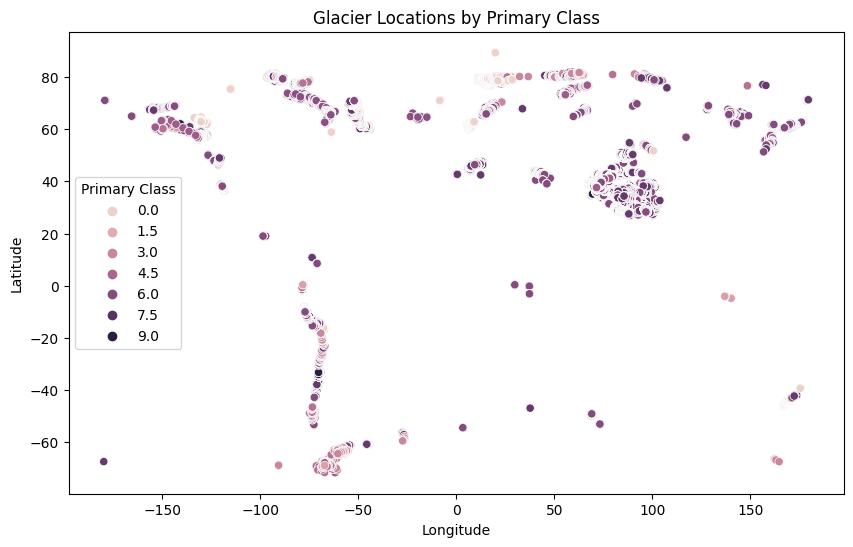

Feature Shape:  (132890, 46)
Target Shape:  (132890,)
Confusion Matrix:
 [[10150  9980]
 [10087  9650]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     20130
           1       0.49      0.49      0.49     19737

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.50     39867
weighted avg       0.50      0.50      0.50     39867



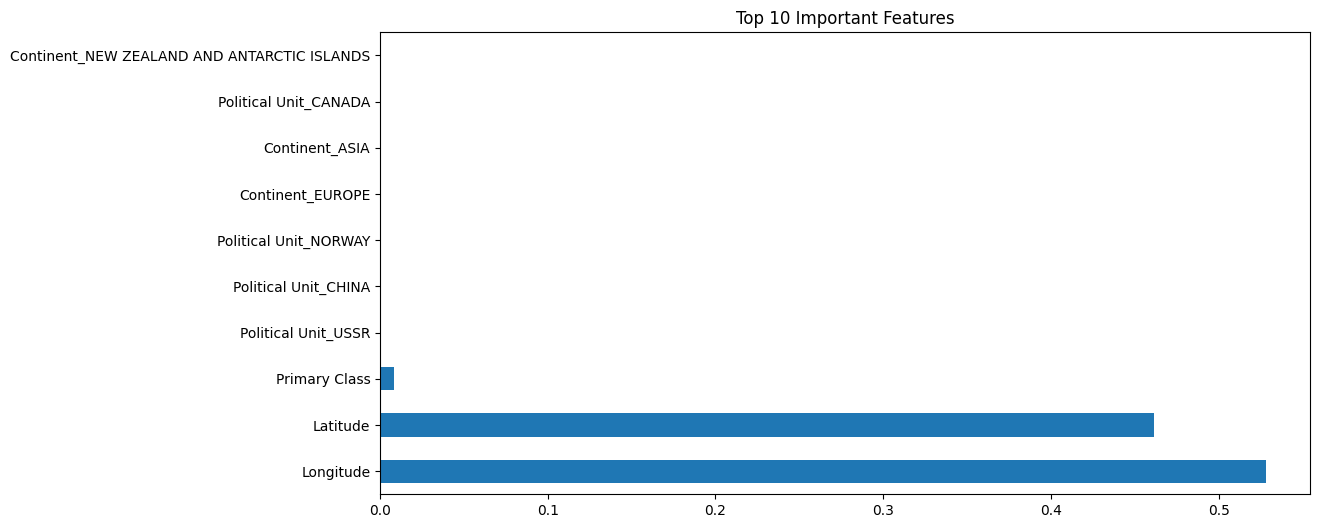

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '/kaggle/input/glacier-inventory/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("Dataset Head:\n", df.head())

# Check for missing values column-wise
print("\nMissing Values per Column:\n", df.isnull().sum())

# Drop columns with too many missing values (e.g., >50% missing data)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

# Fill remaining missing values with appropriate values (e.g., mean for numeric columns)
df = df.fillna(df.mean(numeric_only=True))

# You can also use forward-fill or backward-fill for categorical data
df = df.fillna(method='ffill')

# Ensure the dataset is not empty after handling missing values
if df.empty:
    raise ValueError("The dataset is empty after cleaning. Please check the data.")

# Exploratory Data Analysis (EDA)
# Example of visualizing glacier locations on a map (latitude and longitude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Class', data=df)
plt.title('Glacier Locations by Primary Class')
plt.show()

# Feature Engineering: Converting Categorical Data into Numeric
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)

# Selecting important features for the model
features = df[['Latitude', 'Longitude']].join(df_encoded)

# Placeholder for target (Replace this with actual High Risk vs Low Risk classification)
target = np.random.choice([0, 1], size=len(df))  # Replace this with the actual target

# Verify the shape of features and target
print("Feature Shape: ", features.shape)
print("Target Shape: ", target.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Building: RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(12,6))
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


Accuracy: 0.4967
Precision: 0.4916
Mean Squared Error: 0.5033
Confusion Matrix:
 [[10150  9980]
 [10087  9650]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     20130
           1       0.49      0.49      0.49     19737

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.50     39867
weighted avg       0.50      0.50      0.50     39867



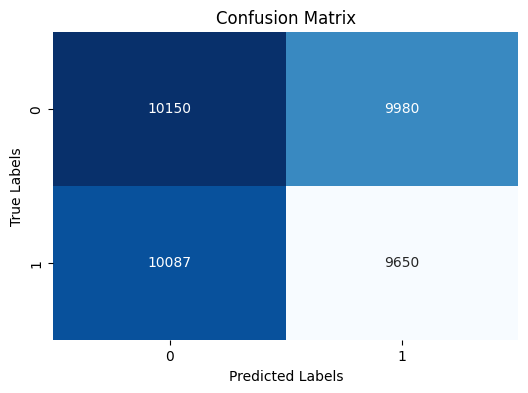

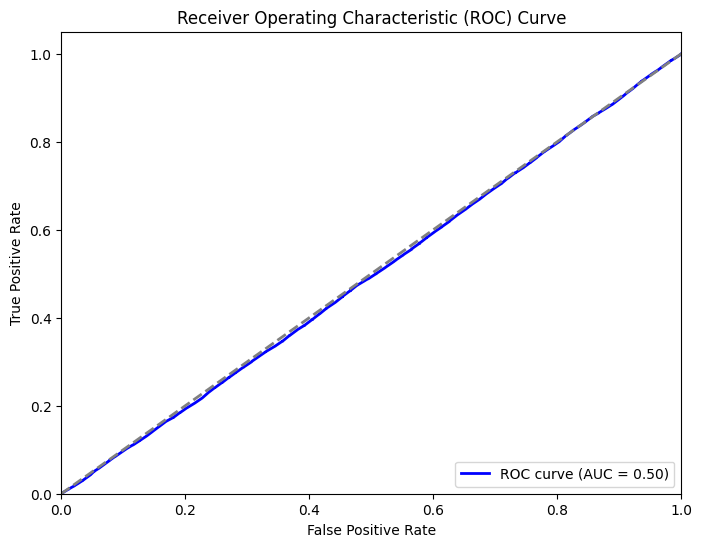

In [3]:
# Import additional metrics
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, roc_curve, auc, confusion_matrix
import seaborn as sns

# Prediction
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [4]:
# Get the size of the dataset in terms of rows and columns
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 132890 rows and 29 columns.


In [5]:
import pandas as pd
from IPython.display import display, HTML

# Assuming 1 represents High Risk, filter the test set for high-risk predictions
high_risk_indices = np.where(y_pred == 1)[0]  # Get indices of high-risk predictions

# Extract the corresponding high-risk locations from the test set
high_risk_zones = X_test.iloc[high_risk_indices]

# Add a column for the risk level
high_risk_zones['Risk_Level'] = 'High'

# Include the names of the places (assuming 'Political Unit' or similar exists in your original dataset)
high_risk_zones_with_names = high_risk_zones.join(df[['Political Unit']].iloc[X_test.index])

# Add an alertness level based on risk level, assigning colors
high_risk_zones_with_names['Alertness_Level'] = 'High Alert'

# Select a random sample of 10 high-risk zones
random_sample = high_risk_zones_with_names.sample(n=20, random_state=42)

# Define a function to apply color coding based on alertness level
def color_alertness(val):
    if val == 'High Alert':
        color = 'red'
    elif val == 'Moderate Alert':
        color = 'orange'
    else:
        color = 'green'
    return f'background-color: {color}'

# Display the random 10 high-risk zones in tabular form with place names and color-coded alertness level
print("Random 20 High Risk Zones with Place Names and Alertness Level:\n")
styled_sample = random_sample[['Latitude', 'Longitude', 'Political Unit', 'Alertness_Level']].style.applymap(color_alertness, subset=['Alertness_Level'])
display(styled_sample)

# Optionally, save the random sample to a CSV file
random_sample.to_csv('random_20_high_risk_zones.csv', index=False)


Random 20 High Risk Zones with Place Names and Alertness Level:



/tmp/ipykernel_17/2227722665.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_zones['Risk_Level'] = 'High'
/tmp/ipykernel_17/2227722665.py:34: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_sample = random_sample[['Latitude', 'Longitude', 'Political Unit', 'Alertness_Level']].style.applymap(color_alertness, subset=['Alertness_Level'])


,Latitude,Longitude,Political Unit,Alertness_Level
96971,-44.265000,168.842000,NEW ZEALAND,High Alert
126461,38.180000,71.770000,USSR,High Alert
132873,67.300000,-154.450000,UNITED STATES,High Alert
10405,57.301000,-129.707000,CANADA,High Alert
118478,39.670000,71.430000,USSR,High Alert
120078,42.280000,78.770000,USSR,High Alert
75975,60.560000,-44.950000,GREENLAND,High Alert
97109,-43.739000,169.971000,NEW ZEALAND,High Alert
23414,72.511000,-76.324000,CANADA,High Alert
83129,33.526000,74.715000,INDIA,High Alert
